### Experiments for creating model for diabetes prediction!!

The data is collected from kaggel(https://www.kaggle.com/) for our work.


In [1]:
# Imoporting necessary libraries
import pandas as pd 

In [2]:
daibetes = pd.read_csv("diabetes.csv") #load the dataset

In [3]:
daibetes.head(2) #show the first 2 rows from the dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0


In [4]:
daibetes.info()  #checking if there is any inconsistency in the dataset
#as we see there are no null values in the dataset, so the data can be processed

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


### ML model development and testing using various ML algorithm

**Features:** all field except 'Outcome'

**Target variable:** Outcome 

In [5]:
daibetes.shape #get the shape of the dataset

(768, 9)

### Steps used for the ML experiment using various Algorithms

 1. First Split the dataset into training and testing dataset. 
 2. Pick an algorithm and initialize it.
 3. Train a model by using test data. We have to use **.fit()** method
 4. We will use the **.predict()** method and test data to get classifcations from the model.
 5. The accuracy will be calculated by **comparing the predicted outcome and the actual Output** .

### Splitting The Data into Training And Testing Dataset

In [6]:
from sklearn.model_selection import train_test_split #to split the dataset for training and testing
train, test = train_test_split(daibetes, test_size = 0.25, random_state=1)# in this our main data is split into train and test
# 20 percent data is kept for testing and rest 80 percent will be used for training.
print(train.shape)
print(test.shape)

(576, 9)
(192, 9)


In [7]:
train_X = train[['Pregnancies','Glucose','BloodPressure','SkinThickness', 'Insulin', 'BMI', 'Age']]# taking the training data features
train_y=train.Outcome# output of our training data
test_X= test[['Pregnancies','Glucose','BloodPressure','SkinThickness', 'Insulin', 'BMI', 'Age']] # taking test data features
test_y =test.Outcome   #output value of test data

Lets check the Train and Test Dataset

In [8]:
train_X.head(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Age
118,4,97,60,23,0,28.2,22
205,5,111,72,28,0,23.9,27


In [9]:
test_X.head(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Age
285,7,136,74,26,135,26.0,51
101,1,151,60,0,0,26.1,22


In [10]:
train_y.head(10)  ##output of the training data

118    0
205    0
506    1
587    0
34     0
257    0
216    1
598    1
761    1
160    0
Name: Outcome, dtype: int64

In [11]:
results = {
    'Decision Tree': 0,
    'SVM':0,
    'Logistic Regression': 0,
    'KNN':0,
    'Random Forest': 0
} # to hold all the accuracies

acc_decimal = 2

### Support Vector Machine (SVM)

In [12]:
from sklearn import metrics #for checking the model accuracy

In [13]:
from sklearn import svm  #for Support Vector Machine (SVM) Algorithm
model = svm.SVC(random_state=1) #select the algorithm
model.fit(train_X,train_y) # we train the algorithm with the training data and the training output
prediction=model.predict(test_X) #now we pass the testing data to the trained algorithm
#we pass the predicted output by the model and the actual output to get accuracy
accuracy = metrics.accuracy_score(prediction,test_y)
results['SVM'] = accuracy*100
print(f"The accuracy of the SVM is: {round(results['SVM'], acc_decimal)} %")

The accuracy of the SVM is: 77.08 %


SVM is giving very good accuracy . We will continue to check the accuracy for different models.

Now we will follow the same steps as above for training various machine learning algorithms.

### Logistic Regression

In [14]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=1, max_iter=1000)
model.fit(train_X,train_y)
prediction=model.predict(test_X)
accuracy = metrics.accuracy_score(prediction,test_y)
results['Logistic Regression'] = accuracy*100
print(f"The accuracy of the Logistic Regression is: {round(results['Logistic Regression'], acc_decimal)} %")

The accuracy of the Logistic Regression is: 77.6 %


/home/itech/My Drive/Projects/Official/Current/health-ai/ml-server/env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Decision Tree

In [15]:
from sklearn.tree import DecisionTreeClassifier #for using Decision Tree Algoithm
model=DecisionTreeClassifier(random_state=1)
model.fit(train_X,train_y)
prediction=model.predict(test_X)
accuracy = metrics.accuracy_score(prediction,test_y)
results['Decision Tree'] = accuracy*100
print(f"The accuracy of the Decision Tree is: {round(results['Decision Tree'], acc_decimal)} %")

The accuracy of the Decision Tree is: 70.83 %


### Random Forest

In [16]:
from sklearn.ensemble import RandomForestClassifier #for using Random Forest Algoithm
model=RandomForestClassifier(random_state=1, max_depth=5)
model.fit(train_X,train_y)
prediction=model.predict(test_X)
accuracy = metrics.accuracy_score(prediction,test_y)
results['Random Forest'] = accuracy*100
print(f"The accuracy of the Random Forest is: {round(results['Random Forest'], acc_decimal)} %")

The accuracy of the Random Forest is: 78.65 %


### K-Nearest Neighbours

In [17]:
from sklearn.neighbors import KNeighborsClassifier  # for K nearest neighbours
model=KNeighborsClassifier()
model.fit(train_X,train_y)
prediction=model.predict(test_X)
accuracy = metrics.accuracy_score(prediction,test_y)
results['KNN'] = accuracy*100
print(f"The accuracy of the KNN is: {round(results['KNN'], acc_decimal)} %")

The accuracy of the KNN is: 74.48 %


Text(0, 0.5, 'accuracy(%)')

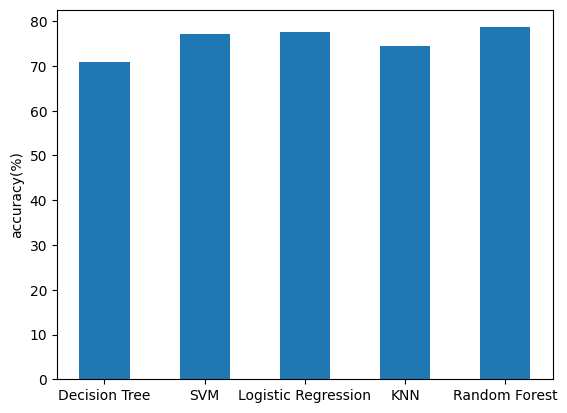

In [18]:
import matplotlib.pyplot as plt
plt.bar(results.keys(), results.values(), width=0.5)
plt.ylabel('accuracy(%)')